# 1. Data Source IBGE

ftp://geoftp.ibge.gov.br/recortes_para_fins_estatisticos/malha_de_setores_censitarios/censo_2010/base_de_faces_de_logradouros/

In [1]:
# Import all libraries 

%matplotlib inline
import pandas as pd
import geopandas as gpd
import os
import zipfile
import shutil
import numpy as np
import fiona

### Open Data Source

In [2]:
# Unpack files
dir = 'Input/TEMP'
if not os.path.exists(dir):
    os.makedirs(dir)

In [3]:
filenames = []
for root, dirs, files in os.walk('Input/Files_IBGE'):
    filenames = files


In [4]:
for item in filenames:
    zip_ref = zipfile.ZipFile('Input/Files_IBGE/' + item, 'r')
    zip_ref.extractall(dir)
    zip_ref.close()

In [5]:
[gpd.read_file(dir + '/' + item[:-4] + '_setor.shp') for item in filenames]

[        ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
 0    358777  310620005640064  URBANO  310620005066   Santa Cruz  310620005   
 1    358778  310620005640065  URBANO  310620005066   Santa Cruz  310620005   
 2    358779  310620005640066  URBANO  310620005069     Ipiranga  310620005   
 3    358780  310620005640067  URBANO  310620005069     Ipiranga  310620005   
 4    358781  310620005640068  URBANO  310620005069     Ipiranga  310620005   
 ..      ...              ...     ...           ...          ...        ...   
 226  359027  310620005640226  URBANO  310620005080  Dom Joaquim  310620005   
 227  359028  310620005640227  URBANO  310620005080  Dom Joaquim  310620005   
 228  359029  310620005640228  URBANO  310620005079   Vila de Sá  310620005   
 229  359031  310620005640230  URBANO  310620005080  Dom Joaquim  310620005   
 230  359032  310620005640231  URBANO  310620005059    Concórdia  310620005   
 
          NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOC

In [6]:
location = pd.concat([gpd.read_file(dir + '/' + item[:-4] + '_setor.shp') for item in filenames], ignore_index=True)

In [7]:
shutil.rmtree(dir)

In [8]:
location.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,geometry
0,358777,310620005640064,URBANO,310620005066,Santa Cruz,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((-43.93669 -19.87490, -43.93631 -19.8..."
1,358778,310620005640065,URBANO,310620005066,Santa Cruz,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((-43.93494 -19.87580, -43.93496 -19.8..."
2,358779,310620005640066,URBANO,310620005069,Ipiranga,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((-43.92972 -19.87582, -43.92915 -19.8..."
3,358780,310620005640067,URBANO,310620005069,Ipiranga,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((-43.93149 -19.87692, -43.93085 -19.8..."
4,358781,310620005640068,URBANO,310620005069,Ipiranga,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((-43.93157 -19.87694, -43.93000 -19.8..."


### CRS

In [9]:
# Currenty CRS

location.crs

{'init': 'epsg:4674'}

In [10]:
location = location.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [11]:
location.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [12]:
location.to_file('teste.shp')

# 2. Geolocation

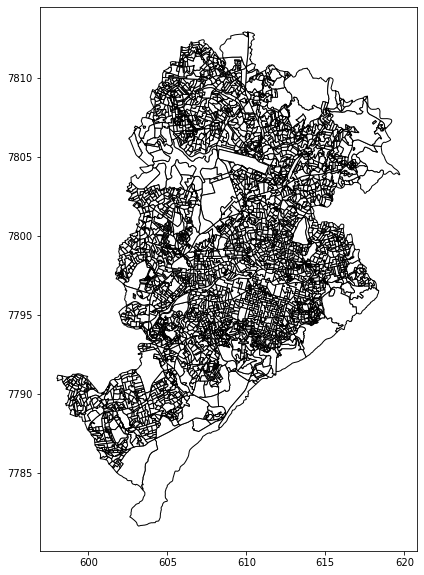

In [13]:
location.plot(color='white', edgecolor='black', figsize=(15, 10))

In [14]:
# Neighborhoods near UFMG

In [15]:
location.NM_BAIRRO.unique()

array(['Santa Cruz', 'Ipiranga', 'Cidade Nova', 'Renascença',
       'Cachoeirinha', 'Vila da Paz', 'Palmares', 'União',
       'Nova Floresta', 'Silveira', 'Concórdia',
       'Vila Nova Cachoeirinha 3ª Seção', 'Vila do Pombal',
       'Colégio Batista', 'Dom Joaquim', 'Lagoinha', 'Graça',
       'Vila Inestan', 'Vila Ipiranga', 'São Cristóvão', 'Maria Virgínia',
       'Andiroba', 'São Paulo', 'Fernão Dias', 'Penha', 'Tiradentes',
       'São Sebastião', 'Canadá', 'Vila São Paulo', 'Vila de Sá',
       'Pongelupe', 'Solar do Barreiro', 'Vila Independencia 1ª Seção',
       'Petropolis', 'Vila Mangueiras', 'Mangueiras', 'Vale do Jatoba',
       'Santa Cecilia', 'Castanheira', 'CDI Jatoba', 'Conjunto Jatoba',
       'Marilandia', 'Tirol', 'Diamante', 'Ademar Maldonado',
       'Teixeira Dias', 'Barreiro', 'Santa Helena', 'Independência',
       'Vila Atila de Paiva', 'Santa Margarida', 'Novo das Industrias',
       'Milionario', 'Vila Nova dos Milionarios', 'Araguaia',
       'Flavio M

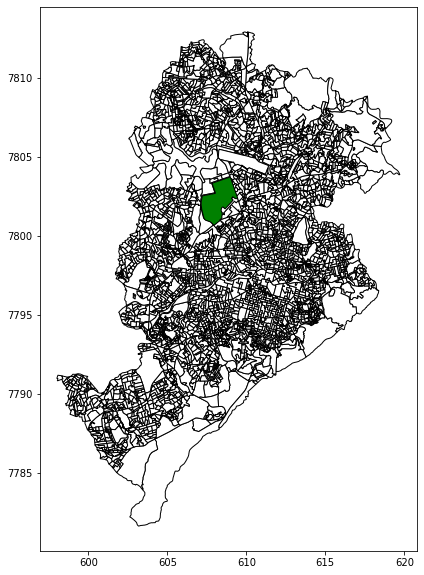

In [16]:
# Campus UFMG
UFMG = location.query("NM_BAIRRO == 'Campos UFMG'")
MAP = location.plot(color='white', edgecolor='black', figsize=(15, 10))
UFMG.plot(ax = MAP, color='green', edgecolor='black')

### Neighborhoods near UFMG

In [17]:
location.query("NM_BAIRRO == 'Campos UFMG'").centroid.values

<GeometryArray>
Length: 1, dtype: geometry

In [18]:
# Calculating Centroid

location['centroid'] = location.centroid

# Calculating Distance to UFMG
centroid_UFMG = location.query("NM_BAIRRO == 'Campos UFMG'").centroid.values
location['Dist_KM'] = location['centroid'].apply(lambda x: centroid_UFMG.distance(x).min())

location.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,geometry,centroid,Dist_KM
0,358777,310620005640064,URBANO,310620005066,Santa Cruz,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((611.320 7802.011, 611.360 7801.990, ...",POINT (611.387 7801.925),3.227827
1,358778,310620005640065,URBANO,310620005066,Santa Cruz,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((611.503 7801.910, 611.501 7801.939, ...",POINT (611.623 7801.840),3.472099
2,358779,310620005640066,URBANO,310620005069,Ipiranga,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((612.049 7801.904, 612.109 7801.927, ...",POINT (611.996 7801.781),3.848714
3,358780,310620005640067,URBANO,310620005069,Ipiranga,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((611.863 7801.784, 611.931 7801.810, ...",POINT (611.970 7801.725),3.830777
4,358781,310620005640068,URBANO,310620005069,Ipiranga,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((611.855 7801.781, 612.018 7801.624, ...",POINT (611.913 7801.689),3.779755


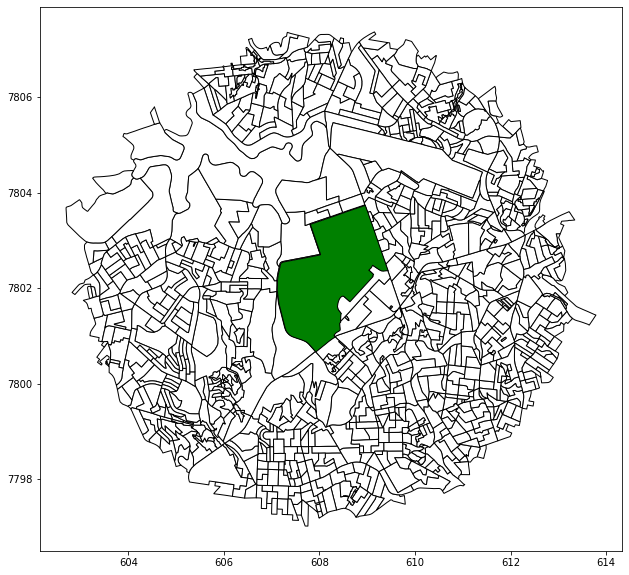

In [19]:
# Search distance less than 5 Km

neighborhoods_UFMG = location.query('Dist_KM < 5')

# Campus UFMG

MAP = neighborhoods_UFMG.plot(color='white', edgecolor='black', figsize=(15, 10))
UFMG.plot(ax = MAP, color='green', edgecolor='black')

In [20]:
neighborhoods_UFMG = neighborhoods_UFMG.drop(columns=['centroid'])
neighborhoods_UFMG

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,geometry,Dist_KM
0,358777,310620005640064,URBANO,310620005066,Santa Cruz,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((611.320 7802.011, 611.360 7801.990, ...",3.227827
1,358778,310620005640065,URBANO,310620005066,Santa Cruz,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((611.503 7801.910, 611.501 7801.939, ...",3.472099
2,358779,310620005640066,URBANO,310620005069,Ipiranga,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((612.049 7801.904, 612.109 7801.927, ...",3.848714
3,358780,310620005640067,URBANO,310620005069,Ipiranga,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((611.863 7801.784, 611.931 7801.810, ...",3.830777
4,358781,310620005640068,URBANO,310620005069,Ipiranga,310620005,BELO HORIZONTE,310620005,NORDESTE,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((611.855 7801.781, 612.018 7801.624, ...",3.779755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,360284,310620005680208,URBANO,310620005274,Manacas,310620005,BELO HORIZONTE,310620005,Pampulha,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((604.784 7799.573, 604.815 7799.497, ...",4.425542
3928,360285,310620005680209,URBANO,310620005274,Manacas,310620005,BELO HORIZONTE,310620005,Pampulha,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((604.950 7799.349, 604.937 7799.361, ...",4.301567
3929,360286,310620005680210,URBANO,310620005274,Manacas,310620005,BELO HORIZONTE,310620005,Pampulha,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((604.880 7800.017, 604.737 7800.059, ...",3.956153
3930,360296,310620005680220,URBANO,310620005262,Castelo,310620005,BELO HORIZONTE,310620005,Pampulha,3106200,BELO HORIZONTE,METROPOLITANA DE BELO HORIZONTE,BELO HORIZONTE,"POLYGON ((604.908 7800.778, 604.909 7800.751, ...",3.648291


In [22]:
neighborhoods_UFMG.to_file('./Output/neighborhoods.shp')